## 多层感知机

### 隐藏层

### 激活函数

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU函数

In [4]:
# x.detach()是把x从计算图中分离出来，不参与梯度的计算
# requires_grad=True用于指定需要对该张量进行梯度计算

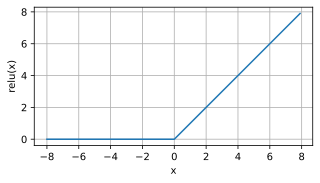

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=((5, 2.5)))

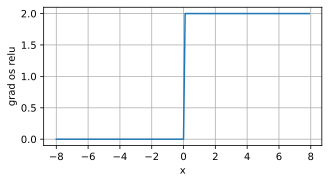

In [6]:
# ReLU函数的导数
y.backward(torch.ones_like(x), retain_graph=True)
# torch.ones_like(x)用于创造一个与x形状相同的值都为1的张量
# 把它放在y.backward()中，指定用于计算梯度的初始梯度值，用初始值×算的的梯度值
# retain_graph=True保留计算图
d2l.plot(x.detach(), x.grad, 'x', 'grad os relu', figsize=((5, 2.5)))

### sigmoid函数

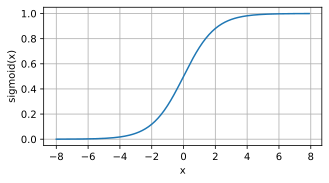

In [9]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=((5, 2.5)))

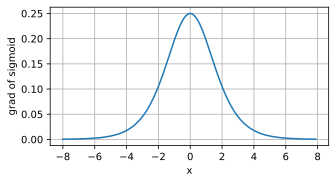

In [10]:
# sigmoid导数
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=((5, 2.5)))

### tanh函数

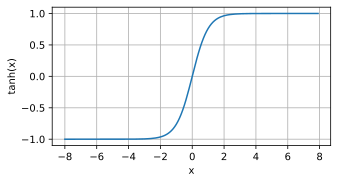

In [11]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=((5, 2.5)))

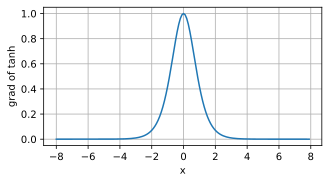

In [13]:
# tanh导数
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=((5, 2.5)))

## 多层感知机的从零开始实现

In [14]:
import torch
from torch import nn
from d2l import torch as d2l

In [15]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 初始化模型参数

In [16]:
# 在这个多层感知机中我们只设置一个隐藏层，256

In [18]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 激活函数

In [19]:
# 实现ReLU函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 模型

In [20]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里@代表矩阵乘法
    return (H@W2 + b2)

### 损失函数

In [21]:
loss = nn.CrossEntropyLoss(reduction='none')

### 训练

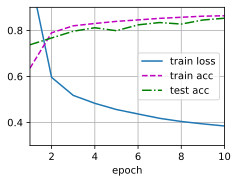

In [22]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

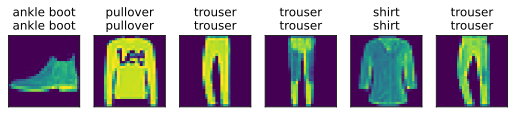

In [23]:
d2l.predict_ch3(net, test_iter)

In [25]:
d2l.train_epoch_ch3??

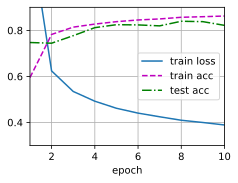

In [28]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 128

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens1, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens1, requires_grad=True))

W2 = nn.Parameter(torch.randn(
    num_hiddens1, num_hiddens2, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_hiddens2, requires_grad=True))

W3 = nn.Parameter(torch.randn(
    num_hiddens2, num_outputs, requires_grad=True) * 0.01)
b3 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2, W3, b3]

num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

描述为什么涉及多个超参数更具挑战性？
1，参数空间的维度增加：每个超参数都代表了一个参数空间中的一个维度。当超参数数量增加时，参数空间的维度也随之增加，使得问题更加复杂。在高维空间中搜索最优解变得更加困难，因为超参数之间可能存在相互依赖和交互作用，影响模型性能。
2，参数之间的相互影响：多个超参数之间通常存在相互依赖和影响。调整一个参数可能会导致其他参数的最优值发生变化。这样的相互作用增加了最优超参数组合的难度。找到一个全局最优解需要在多维度空间中进行探索，这对于优化算法来说是一项具有挑战性的任务。
3，计算资源的需求增加：在多个超参数的情况下，需要尝试更多的组合和配置，以找到最佳的超参数组合。这将导致更多的计算资源需求，例如更长的训练时间和更多的计算成本。
4，交互效应的复杂性：多个超参数可能会有复杂的交互效应，这意味着它们在一起的组合可能导致非线性的影响。这种非线性关系使得问题更加复杂，并且通常需要更多的实验来找到最佳组合。
5，过拟合和泛化问题：在多个超参数的调整过程中，存在过拟合的风险，即优化得到的参数在训练集上表现很好，但在未知数据上表现较差，确保找到的超参数组合具有较好的泛化性能是一项挑战。
解决方法：
1，使用合适的优化算法：选择适合高维空间搜索的优化算法，如随机搜索，网格搜索，贝叶斯优化等
2，交叉验证：使用交叉验证来评估不同超参数组合的性能，帮助避免过拟合，并提供更可靠的评估指标。
3，自动调参：考虑使用自动调参工具或库，以减少手动调整超参数的工作量。自动调参工具可以更高效地在参数空间中搜索最优解。
4，特征选择和降维：在参数空间较大的情况下，可以考虑使用特征选择或降维技术来减少超参数的数量，从而降低问题的复杂性。
5，并行计算：利用并行计算资源，例如多个GPU或分布式计算，可以加速超参数搜索的过程。

## 多层感知机的简洁实现

In [1]:
# 本节通过高级API更简洁地实现多层感知机

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

### 模型

In [9]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [10]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

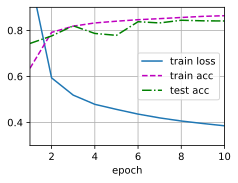

In [11]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 模型选择、欠拟合和过拟合

作为机器学习科学家，我们地目标是发现模式（pattern）。但是，我们如何才能确定模型是真正发现了一种泛化的模式，而不是简单地记住了数据呢？例如，我们想要在患者的基因数据与痴呆状态之间寻找模式，其中标签是从集合{痴呆、轻度认知障碍、健康}中提取的。因为基因可以唯一确定每个个体（不考虑双胞胎），所以在这个任务中是有可能记住整个数据集的。

我们不想让模型只会做这样的事情：“那是鲍勃！我记得他！他有痴呆症！”。原因很简单：当我们将来部署该模型时，模型需要判断从未见过的患者。只有当模型真正发现了一种泛化模式时，才会作出有效的预测。

更正式地说，我们的目标是发现某些模式，这些模式捕获到了我们训练集潜在总体的规律。如果成功做到了这点，即使是对以前从未遇到过的个体，模型也可以成功地评估风险。如何发现可以泛化的模式是机器学习的根本问题。

困难在于，当我们训练模型时，我们只能访问数据中的小部分样本。最大的公开图像数据集包含大约一百万张图像。而大部分时候，我们只能从数千或数万个数据样本中学习。在大型医院系统中，我们可能访问数十万份医疗记录。当我们使用有限的样本时，可能会遇到这样的问题：当收集到更多的数据时，会发现之前找到的明显关系并不成立。

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为过拟合，用于对抗过拟合的技术称为正则化（regularization）。在前面的章节中，有些读者可能在用Fashion-MNIST数据集做过实验时已经观察到了这种过拟合现象。在实验中调整模型架构或超参数时会发现：如果有足够多的神经元，层数和训练迭代周期，模型最终可以在训练集上达到完美的精度，此时测试集的准确性却下降了。

### 训练误差和泛化误差

为了进一步讨论这一现象，我们需要了解训练误差和泛化误差。训练误差（training error）是指，模型在训练数据集上计算得到的误差。泛化误差（generalization error）是指，模型应用在同样从原始样本的分布中抽取的无线多数据样本时，模型误差的期望

问题是，我们永远不能准确地计算出泛化误差。这是因为无限多的数据样本是一个虚构的对象。在实际中，我们只能通过将模型应用于一个独立的测试集来评估泛化误差，该测试集由随机选取的，未曾在训练集中出现的数据样本构成。

下面三个思维实验将有助于更好地说明这种情况。
假设一个大学生正在努力准备期末考试。一个勤奋的学生会努力做好练习，并利用往年的考试题目来测试自己的能力。尽管如此，在过去的考试题目上取的好成绩并不能保证他会在真正考试时发挥出色。例如，学生可能试图通过死记硬背考题的答案来做准备。他甚至可以完全记住过去考试的答案。另一名学生可能会通过试图理解给出某些答案的原因来做准备。在大多数情况下，后者会考的更好。

类似地，考虑一个简单地使用查表法来回答问题的模型。如果允许的输入集合是离散的并且相当小，那么也许在查看许多训练样本后，该方法将执行的很好。但当这个模型面对从未见多的例子时，它表现的可能比随机猜测好不到哪去。这是因为输入空间太大了，远远不可能记住每一个可能的输入所对应的答案。例如，考虑28×28的灰度图像。如果每个像素可以取256个灰度值中的一个，则有256**784个可能的图像。这意味着指甲大小的低分辨率灰度图像的数量比宇宙中的原子要多得多。即使我们可能遇到这样的数据，我们也不能存储整个查找表。

最后，考虑对掷硬币的结果（类别0：正面，类别1：反面）进行分类的问题。假设硬币是公平的，无论我们相出什么算法，泛化始终是1/2，然而，对于大多数算法，我们应该期望训练误差会更低（取决于运气）。考虑数据集{0，1，1，1，0，1}。我们的算法不需要额外的特征，将倾向于总是预测多数类，从我们有限的样本来看，它似乎是1占主流。在这种情况下，总是预测类1的模型将产生1/3的误差，这笔我们的泛化误差要好得多。当我们逐渐增加数据量，正面比例明显偏离1/2的可能性将会降低，我们的训练误差将与泛化误差相匹配。

### 统计学理论

由于泛化是机器学习中的基本问题，许多数学家和理论家毕生致力于研究描述 这一现象的形式理论。
我们假设训练数据都是从相同的分布中独立提取的。这通常被称为独立同分布假设，这意味着对数据进行采样的过程没有进行“记忆”。换句话说，抽取的第2个样本和第3个样本的相关性，并不比抽取的第2个样本和第200万个样本的相关性强。

要成为一名优秀的机器学习科学家需要具备批判思考能力。假设是存在漏洞的，即很容易找出假设失效的情况。如果我们根据从加州大学旧金山分校医学中心的患者数据训练死亡风险预测模型，并将其应用于马萨诸塞州综合医院的患者数据，结果会怎样？这两个数据的分布可能不完全一样。此外，抽样过程可能与时间相关。比如当我们对微博的主体进行分类时，新闻周期会使得正在讨论的话题产生时间依赖性，从而违反独立性假设。

有时候我们即使轻微违背独立同分布假设，模型仍将继续运行得非常好。比如，我们有许多有用得工具已经应用于现实，如人脸识别、语音识别和语言翻译。毕竟，几乎所有现实的应用都至少涉及一些违背独立同分布假设的情况。

有些违背独立同分布假设的行为肯定会带来麻烦。比如，我们试图只用来自大学生的人脸数据来训练一个人脸识别系统，然后想要用它来监测疗养院中的老人。这不太可能有效，因为大学生看起来往往与老年人有很大的不同。

在接下来的章节中，我们将讨论因违背独立同分布假设而引起的问题。目前，即使认为独立同分布假设是理所当然的，理解泛化性也是一个困难的问题。此外，能够解释深层神经网络泛化性能的理论基础，也仍在继续困扰着学习理论领域最伟大的学者们。

当我们训练模型时，我们试图找到一个能够尽可能拟合训练数据的函数。但是如果它执行的“太好了”，而不能对看不见的数据做到很好的泛化，就会导致过拟合。这种情况正是我们想要避免或控制的。深度学习中有许多启发式的技术旨在防止过拟合。

### 模型复杂性

当我们有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近。当我们有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。模型复杂性由什么构成是一个复杂的问题。一个模型是否能很好地泛化取决于很多因素。例如，具有更多参数的模型可能被认为更复杂，参数有更大取值范围的模型可能更为复杂。通常对于神经网络，我们认为需要更多训练迭代的模型比较复杂，而需要早停（early stopping）的模型（即较少的训练迭代周期）就不那么复杂。

我们很难比较本质上不同大类的模型之间（例如，决策树与神经网络）的复杂性。就目前而言，一条简单的经验法则相当有用：统计学家认为，能够轻松解释任意事实的模型是复杂的，而表达能力有限但仍能很好地解释数据的模型可能更有现实用途。在哲学上，这与波普尔的科学理论的可证伪性标准密切相关：如果一个理论能拟合数据，且有具体的测试可以用来证明它是错误的，那么它就是好的。这一点很重要，因为所有的统计估计都是事后归纳。也就是说，我们在观察事实之后进行估计，因此容易受到相关谬误的影响。目前，我们将把哲学放在一边，坚持更切实的问题。

几个倾向于影响模型泛化的因素：
1，可调整参数的数量。当可调整参数的数量（有时称为自由度）很大时，模型往往更容易过拟合。
2，参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。
3，训练样本的数量。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

### 模型选择

In [1]:
# 在机器学习中，我们通常在评估几个候选模型后选择最终的模型。这个过程叫做模型的选择。
# 有时，需要进行比较的模型在本质上是完全不同的（比如，决策树与线性模型）。又有时
# 我们需要比较不同的超参数设置下的同一类模型。
# 例如，训练多层感知机模型时，我们可能希望⽐较具有不同数量的隐藏层、不同数量的隐藏单元以及不同的
# 激活函数组合的模型。为了确定候选模型中的最佳模型，我们通常会使⽤验证集。

In [2]:
# 验证集
# 原则上，在我们确定所有的超参数之前，我们不希望⽤到测试集。如果我们在模型选择过程中使⽤测试数据，
# 可能会有过拟合测试数据的⻛险，那就⿇烦⼤了。如果我们过拟合了训练数据，还可以在测试数据上的评估
# 来判断过拟合。但是如果我们过拟合了测试数据，我们⼜该怎么知道呢？
# 因此，我们决不能依靠测试数据进⾏模型选择。然⽽，我们也不能仅仅依靠训练数据来选择模型，因为我们
# ⽆法估计训练数据的泛化误差。
# 在实际应⽤中，情况变得更加复杂。虽然理想情况下我们只会使⽤测试数据⼀次，以评估最好的模型或⽐较
# ⼀些模型效果，但现实是测试数据很少在使⽤⼀次后被丢弃。我们很少能有充⾜的数据来对每⼀轮实验采⽤
# 全新测试集。
# 解决此问题的常⻅做法是将我们的数据分成三份，除了训练和测试数据集之外，还增加⼀个验证数据集
# （validation dataset），也叫验证集（validation set）。但现实是验证数据和测试数据之间的边界模糊得令
# ⼈担忧。除⾮另有明确说明，否则在这本书的实验中，我们实际上是在使⽤应该被正确地称为训练数据和验
# 证数据的数据集，并没有真正的测试数据集。因此，书中每次实验报告的准确度都是验证集准确度，⽽不是
# 测试集准确度。

In [3]:
# K折交叉验证
# 当训练数据稀缺时，我们甚⾄可能⽆法提供⾜够的数据来构成⼀个合适的验证集。这个问题的⼀个流⾏的解
# 决⽅案是采⽤K折交叉验证。这⾥，原始训练数据被分成K个不重叠的⼦集。然后执⾏K次模型训练和验证，
# 每次在K − 1个⼦集上进⾏训练，并在剩余的⼀个⼦集（在该轮中没有⽤于训练的⼦集）上进⾏验证。最后，
# 通过对K次实验的结果取平均来估计训练和验证误差。

### 欠拟合还是过拟合

In [4]:
# 当我们⽐较训练和验证误差时，我们要注意两种常⻅的情况。⾸先，我们要注意这样的情况：训练误差和验
# 证误差都很严重，但它们之间仅有⼀点差距。如果模型不能降低训练误差，这可能意味着模型过于简单（即
# 表达能⼒不⾜），⽆法捕获试图学习的模式。此外，由于我们的训练和验证误差之间的泛化误差很⼩，我们有
# 理由相信可以⽤⼀个更复杂的模型降低训练误差。这种现象被称为⽋拟合（underfitting）。
# 另⼀⽅⾯，当我们的训练误差明显低于验证误差时要⼩⼼，这表明严重的过拟合（overfitting）。注意，过拟
# 合并不总是⼀件坏事。特别是在深度学习领域，众所周知，最好的预测模型在训练数据上的表现往往⽐在保
# 留（验证）数据上好得多。最终，我们通常更关⼼验证误差，⽽不是训练误差和验证误差之间的差距。
# 是否过拟合或⽋拟合可能取决于模型复杂性和可⽤训练数据集的⼤⼩，这两个点将在下⾯进⾏讨论。

In [5]:
# 模型复杂性
# ⾼阶多项式函数⽐低阶多项式函数复杂得多。⾼阶多项式的参数较多，模型函数的选择范围较⼴。因此在固
# 定训练数据集的情况下，⾼阶多项式函数相对于低阶多项式的训练误差应该始终更低（最坏也是相等）。事
# 实上，当数据样本包含了x的不同值时，函数阶数等于数据样本数量的多项式函数可以完美拟合训练集

In [6]:
# 数据集大小
# 另⼀个重要因素是数据集的⼤⼩。训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。随着
# 训练数据量的增加，泛化误差通常会减⼩。此外，⼀般来说，更多的数据不会有什么坏处。对于固定的任务
# 和数据分布，模型复杂性和数据集⼤⼩之间通常存在关系。给出更多的数据，我们可能会尝试拟合⼀个更复
# 杂的模型。能够拟合更复杂的模型可能是有益的。如果没有⾜够的数据，简单的模型可能更有⽤。对于许多
# 任务，深度学习只有在有数千个训练样本时才优于线性模型。从⼀定程度上来说，深度学习⽬前的⽣机要归
# 功于廉价存储、互联设备以及数字化经济带来的海量数据集。

### 多项式回归

In [7]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [8]:
# 生成数据集
# 拟合三阶多项式y = 5 + 1.2x − 3.4 x2/2!+ 5.6 x3/3!+ ϵ where ϵ ∼ N(0,0.1 2 ).
# 噪声项ϵ服从均值为0且标准差为0.1的正态分布。在优化的过程中，我们通常希望避免⾮常⼤的梯度值或损失
# 值。这就是我们将特征从x i 调整为 xi/i! 的原因，这样可以避免很⼤的i带来的特别⼤的指数值。我们将为训练集
# 和测试集各⽣成100个样本。

In [9]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100 # 训练和测试数据集大小
true_w = np.zeros(max_degree) # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i+1)  # gamma(n) = (n-1)!



In [10]:
poly_features.shape

(200, 20)

In [12]:
# labels的维度:(n_train+n_test, )
labels = np.dot(poly_features, true_w)

In [13]:
labels.shape

(200,)

In [16]:
# Numpy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32)
                                          for x in [true_w, features, poly_features, labels]]

In [17]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 1.5276],
         [-0.7416]]),
 tensor([[ 1.0000e+00,  1.5276e+00,  1.1668e+00,  5.9411e-01,  2.2689e-01,
           6.9318e-02,  1.7648e-02,  3.8513e-03,  7.3541e-04,  1.2482e-04,
           1.9068e-05,  2.6479e-06,  3.3708e-07,  3.9609e-08,  4.3219e-09,
           4.4014e-10,  4.2022e-11,  3.7760e-12,  3.2045e-13,  2.5764e-14],
         [ 1.0000e+00, -7.4156e-01,  2.7496e-01, -6.7967e-02,  1.2600e-02,
          -1.8688e-03,  2.3097e-04, -2.4469e-05,  2.2681e-06, -1.8689e-07,
           1.3859e-08, -9.3429e-10,  5.7736e-11, -3.2935e-12,  1.7445e-13,
          -8.6245e-15,  3.9973e-16, -1.7437e-17,  7.1835e-19, -2.8037e-20]]),
 tensor([6.1931, 2.7947]))

### 对模型进行训练和测试

In [18]:
# 首先我们实现一个函数来评估模型在给定数据集上的损失
# d2l.evaluate_loss()
def evaluate_loss(net, data_iter, loss):
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和， 样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [23]:
# 定义训练函数
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

In [24]:
# reshape(-1, 1)转换为列向量
# net.parameters()获取神经网络可学习的参数

In [39]:
nn.MSELoss?

### 三项多项式函数拟合（正常）

weight: [[ 4.9998903  1.2009777 -3.3997786  5.598187 ]]


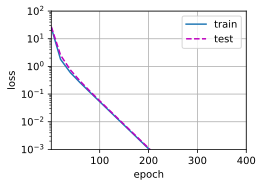

In [26]:
# 从多项式特征中选择前四个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 线性函数拟合（欠拟合）

weight: [[3.0866656 4.1387057]]


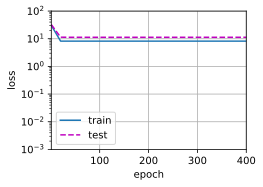

In [32]:
# 从多项式特征中选择前两个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 高阶多项式函数拟合（过拟合）

weight: [[ 4.99141598e+00  1.28132486e+00 -3.35576344e+00  5.16285181e+00
  -2.13735253e-01  1.25277841e+00  2.03457534e-01  2.14139804e-01
   1.26680518e-02  1.70520693e-01 -2.86535714e-02  4.60727140e-03
   1.48907557e-01  1.14903837e-01 -1.73911527e-02  2.79950351e-02
  -2.96350438e-02  9.44538713e-02  1.17982954e-01 -1.54318422e-01]]


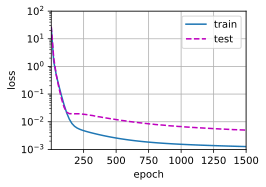

In [35]:
# 从多项式特征中取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)